# ASI assessed exercise 2015/2016
### 22nd April 2016

In this work you will analyze two datasets on wine quality available from the UCI machine learning repository: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Listed below are various exercises to undertake. Note that in each case you should implement the algorithms yourselves - you may not use other implementations - and should submit all of your code.

# Submission

You are free to use any language of your choosing but it is your responsibility to ensure that we can compile (if necessary) and run your code. We recommend you use either Matlab or Python. Please submit either: <br>
• Your code (including instructions for running - there should be one script that answers all the questions) and a .pdf report documenting your answers to the exercises... <br>
• Or (preferably) a single iPython notebook or Matlab Script that we can run. If you take this route, please also submit a .pdf output of the script (iPython: print the html to pdf; Matlab publish the script to html and then print the html to pdf). Your notebook or script should include any text descriptions required in the answers. (Matlab’s cell mode allows you to produce nice text and latex etc; iPythons markdown cells allow you to add text)  
Submission will be through the ASI collaborative space.
The deadline is Friday 27th May 2016 at 4:00pm.

# Exercises

# 1. (code) 
#### Download the red and white wine .csv files and import them. The first 11 columns are features and the final column is the target. [3]  

In [1]:
import numpy as np
import pandas as pd

red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

red_df[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


In [2]:
# list of all the features
features=[]
for feature in red_df[:0]:
    features.append(feature)
features=features[:-1]
print features

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# 2. (code)
#### Plot bar-plots of the number of examples with each target value for the two datasets. [3]  

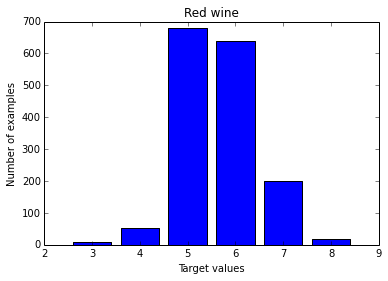

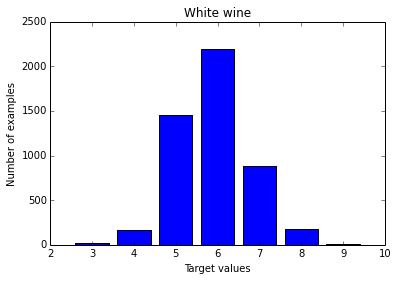

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py

def plot_examples(df_name, name):
    x = df_name.quality.unique()
    y = []
    for i in x:
        y = np.append(y, int(df_name[df_name.quality == i].count()[0]))
    
    plt.title(name+' wine')
    plt.xlabel('Target values')
    plt.ylabel('Number of examples')    
    plt.bar(x, y, align='center')
    plt.show()
    
plot_examples(red_df, 'Red')
plot_examples(white_df, 'White')

# 3. (words)
#### Comment on these distributions. How might they effect the analysis? [4]  

Blablabla

# 4. Linear regression:

# 4a. (code) 
#### We will now concentrate on the red wine data. Randomly split the data into a training and test set with 70% of the examples in the training and 30% in the test. [5]  

In [4]:
# define the rows numbers and shuffle them 
rows = list(red_df.index)
row_count = len(rows)
np.random.shuffle(rows)

# order the data rows according to the previous shuffling and reindex them
shuffled_red_df = red_df.reindex(rows).reset_index(drop=True)

train_data = shuffled_red_df[:row_count*70 // 100]
test_data = shuffled_red_df[row_count*70 // 100:].reset_index(drop=True)

train_data[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.36,0.32,2.2,0.081,32,79,0.99640,3.30,0.72,11.0,6
1,8.4,0.52,0.22,2.7,0.084,4,18,0.99682,3.26,0.57,9.9,6
2,7.7,0.51,0.28,2.1,0.087,23,54,0.99800,3.42,0.74,9.2,5
3,9.1,0.22,0.24,2.1,0.078,1,28,0.99900,3.41,0.87,10.3,6
4,11.9,0.38,0.51,2.0,0.121,7,20,0.99960,3.24,0.76,10.4,6
5,11.3,0.62,0.67,5.2,0.086,6,19,0.99880,3.22,0.69,13.4,8
6,7.5,0.31,0.41,2.4,0.065,34,60,0.99492,3.34,0.85,11.4,6
7,7.1,0.60,0.01,2.3,0.079,24,37,0.99514,3.40,0.61,10.9,6
8,7.2,0.36,0.46,2.1,0.074,24,44,0.99534,3.40,0.85,11.0,7
9,5.7,1.13,0.09,1.5,0.172,7,19,0.99400,3.50,0.48,9.8,4


# 4b. (code)
#### Fit a linear regression to the training data. [5]  

In [5]:
# for feature in features:
#     train_data.plot(kind='scatter', x=feature, y='quality')
    
# plt.show()

We could calculate each (w0, w1) for each feature and have a a different linear regression for every feature. Instead, we compute a mean w0 and 11 coefficients w1, w2, ..., w11 to compute a polynomial function on the form:<br> P= w0 + w1*x1 + ... + w11*x11, where x1, ..., x11 are the values corresponding to each feature for a specific wine.<br>    
Thus, even though we are producing a polynomial fit, we still have a linear regression problem because the hypothesis is linear in each feature. 

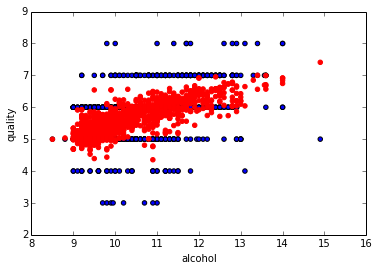

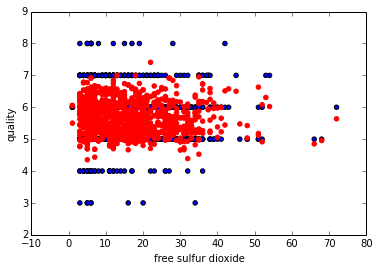

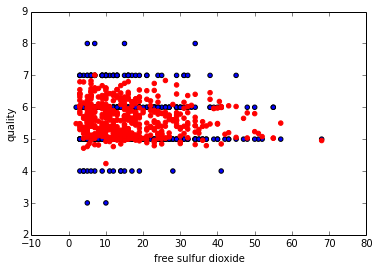

In [5]:
# compute X matrix which is a 1119x12 matrix
# a first row of ones (x^0) and the value of each feature as the 11 following rows
def X_data_vector(data):
    vector = pd.DataFrame(np.ones((len(red_df), 1))).join(data.drop('quality', 1), how='right')
    vector = np.array(vector)
    return vector

# compute Y vector (1119x1)
def Y_target_vector(data):
    vector = np.array(data['quality'])
    return vector

# compute W vector (12x1) with the formula [t(X).X](^-1).t(X).Y
def W_vector(data):
    o = np.dot(X_data_vector(data).transpose(), X_data_vector(data))
    p = np.linalg.inv(o)
    q = np.dot(X_data_vector(data).transpose(), Y_target_vector(data))
    vector = np.dot(p, q)
    return vector

# compute pred vector (1119x1) built with W_vector computed on the training dataset
def pred_vector(data):
    pred = np.dot(W_vector(train_data), X_data_vector(data).transpose())
    return pred

# plot the linear regression for a dataset for a given feature
def linear_regression(data, feature):
    plt.scatter(data[feature], pred_vector(data), color='r')
    return

# plot the quality predictions in red and the real quality values in blue for a given feature
def linear_on_data(data, feature):
    data.plot(kind='scatter', x=feature, y='quality')
    linear_regression(data, feature)
    return plt.show()

# plot the linear regression on the training dataset for 3 different features
linear_on_data(train_data, 'alcohol')
linear_on_data(train_data, 'free sulfur dioxide')
linear_on_data(test_data, 'free sulfur dioxide')

# 4c. (code) 
#### Make a scatter plot the predictions versus the true targets for the test set and compute the  mean squared error on the test set [5]  

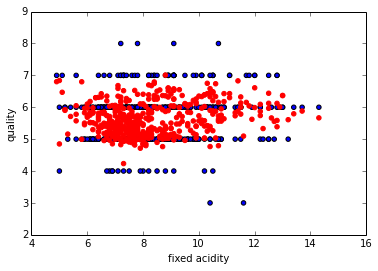

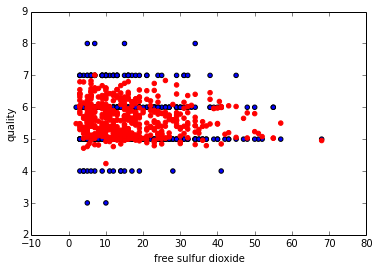

Mean squared error: 0.380502887383


In [6]:
# plot the linear regression on the test dataset for 2 different features
linear_on_data(test_data, 'fixed acidity')
linear_on_data(test_data, 'free sulfur dioxide')

# compute the mean squared error on the test dataset
def mean_square_error(data):
    pred = pred_vector(data)
    error = sum((pred-data['quality'])**2/len(data['quality']))
    return error

print('Mean squared error: '+str(mean_square_error(test_data)))

In [8]:
mean_square_error(train_data)

0.39984845792002599

# 4d. (words) 
#### Suggest a benchmark that you could use to decide if this mean squared error value is good.  [5] 

The mean squared error can be interpreted as the average error on the predicted quality for a given wine.<br>
Thus, if a wine is predicted having a 6-quality for example, the model expects the real quality to be approximatively between 4.7 and 7.3. 
<br><br>
Confidence interval: 
I decided to calculate 90% confidence intervals for my coefficients, which means that my model will be considered good - and the calculated error relevant - if 90% of the quality predictions are consistent with their corresponding wine sample. The benchmark thus will be the number of wine samples whose true quality is between the predicted one +/- the mean squared error value.

# 4e. (code) 
#### Implement your benchmark. [5] 

In [7]:
def benchmark(data):
    error = mean_square_error(data)
    count = 0
    # count the number of samples close enough to their predictions
    for i in range(len(data)):
        if abs(data['quality'][i] - pred_vector(data)[i]) <= error:
            count += 1
    
    # calculate their pourcentage among all the data
    result = count*100/len(data);
    return str(result)+'%'

benchmark(test_data)

'49%'

In [8]:
benchmark(train_data)

'52%'

# 4f. (words) 
#### Briefly discuss the linear regression performance with respect to the benchmark. [5]

Overfitting! <br>
Then, there are 68% of wine samples whose predicted quality is equal (+/- the mean squared error) to the true quality. This is quite far from the 95%-confidence interval I expected to reach. Thus with respect to this benchmark, the linear regression gives poor results and must be improved to give relevant results.

# 5. Regularized linear regression:

# 5a. (code) 
#### Implement regularized least squares and make a plot of the test performance versus the regularization parameter. [10] 

In [9]:
def reg_W_vector(train_set, param):
    # compute a matrix identity with a zero in the upper left 
    mat = np.identity(12)
    mat[0][0]=0
    
    # compute regularized W vector (1x12) with the formula [t(X).X + param*mat](^-1).t(X).Y
    o = np.dot(X_data_vector(train_set).transpose(), X_data_vector(train_set))
    p = np.linalg.inv(o + param*mat)
    q = np.dot(X_data_vector(train_set).transpose(), Y_target_vector(train_set))
    vector = np.dot(p, q)
    return vector

# compute the regularized pred vector (1119x1) computed from the test features values
def reg_pred_vector(train_set, test_set, param):
    pred = np.dot(reg_W_vector(train_set, param), X_data_vector(test_set).transpose())
    return pred

# compute the regularized mean squared error on the test dataset depending on the regularization parameter
def reg_mean_square_error(train_set, test_set, param):
    pred = reg_pred_vector(train_set, test_set, param)
    error = sum((pred-test_set['quality'])**2)/len(test_set['quality'])
    return error

# xlarge = np.arange(-10,10,0.1)
# ylarge = [] 
# for i in xlarge:
#     ylarge.append(reg_mean_square_error(train_data, test_data, i))

# plt.plot(xlarge, ylarge)
# plt.show()

# for i in xlarge:
#     if reg_mean_square_error(data, i) == min(ylarge):
#         print 'Optimal regularization parameter: '+str(i)
#         print 'Optimal mean squared error: '+str(min(ylarge))

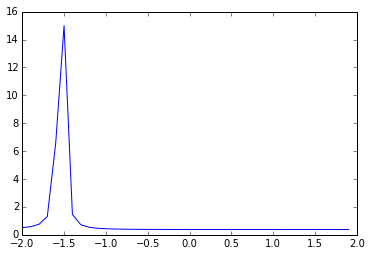

Optimal regularization parameter: 1.2
Optimal mean squared error: 0.377893553365


In [10]:
def plot_param(train_set, test_set):
    x = np.arange(-2,2,0.1)
    y = [] 
    for i in x:
        y.append(reg_mean_square_error(train_set, test_set, i))
   
    plt.plot(x, y)
    return plt.show()

# compute the optimal regularization parameter and the corresponding mean squared error
def opt_param(train_set, test_set):
    x = np.arange(-2,2,0.1)
    y = [] 
    for i in x:
        y.append(reg_mean_square_error(train_set, test_set, i))
    
    for i in x:
        if reg_mean_square_error(train_set, test_set, i) == min(y):
            print 'Optimal regularization parameter: '+str(i)
            print 'Optimal mean squared error: '+str(min(y))
        
    return

plot_param(train_data, test_data)
opt_param(train_data, test_data)

# 5b. (words) 
#### Describe why this is not a good way of determining the value of the regularization parameter. [5]  

OVERFITTING!!
Because tis method is not precise enough and highlights only local minima.<br>
We are trying to determine the value of the regularization parameter by evaluating it on the test_data, that is the dataset we wanted to predict at the first place...Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.<br>
It is not a useful estimator of model performance and thus the error on the test data set does not properly represent the assessment of model performance. This may be because there is not enough data available or there is not a good distribution and spread of data to partition it into separate training and test sets in the conventional validation method. 

# 5c. (code) 
#### Implement a 10-fold CV on the training data and use this to determine the value of the regularization parameter. Quote the optimal value, and the performance at this value on the test set. [10]  

In [11]:
# define the rows numbers and shuffle them (as previously)
train_rows = list(train_data.index)
train_rows_count = len(train_rows)
np.random.shuffle(train_rows)
fold_size = train_rows_count/10

# order the training data rows according to the previous shuffling and reindex them
shuffled_train_data = train_data.reindex(train_rows).reset_index(drop=True)

# set the 10 folds 
fold = dict()
for k in range(10):
    fold[k] = shuffled_train_data[k*fold_size:(k+1)*fold_size].reset_index(drop=True)

# Here are the 10 first rows of the first fold
fold[1][:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.2,0.41,0.43,2.20,0.110,11,37,0.99728,3.16,0.67,10.8,5
1,9.3,0.33,0.45,1.50,0.057,19,37,0.99498,3.18,0.89,11.1,7
2,8.7,0.69,0.31,3.00,0.086,23,81,1.00020,3.48,0.74,11.6,6
3,11.1,0.31,0.53,2.20,0.060,3,10,0.99572,3.02,0.83,10.9,7
4,7.0,0.69,0.07,2.50,0.091,15,21,0.99572,3.38,0.60,11.3,6
5,7.2,0.57,0.05,2.30,0.081,16,36,0.99564,3.38,0.60,10.3,6
6,5.2,0.34,0.00,1.80,0.050,27,63,0.99160,3.68,0.79,14.0,6
7,7.7,0.49,0.26,1.90,0.062,9,31,0.99660,3.39,0.64,9.6,5
8,11.9,0.40,0.65,2.15,0.068,7,27,0.99880,3.06,0.68,11.3,6
9,6.8,0.57,0.00,2.50,0.072,32,64,0.99491,3.43,0.56,11.2,6


In [12]:
# split the data into one training dataset and one validation dataset for each k folds
# indeed, for each k, the k-fold will be the validation dataset and the 9 others will compose the training dataset.
CV_train = dict()
CV_test = dict()
for k in range(10):
    CV_train[k] = pd.concat([fold[i] for i in range(10) if i!=k]).reset_index(drop=True)
    CV_test[k] = fold[k]

In [13]:
# thanks to the "generic" functions previously defined, everything can easily be computed
CV_opt_param = dict()
for k in range(10):
    print 'Validation on fold '+str(k)+':'
    CV_opt_param[k] = opt_param(CV_train[k], CV_test[k]) 

Validation on fold 0:
Optimal regularization parameter: 1.9
Optimal mean squared error: 0.482237326157
Validation on fold 1:
Optimal regularization parameter: -0.7
Optimal mean squared error: 0.324733510727
Validation on fold 2:
Optimal regularization parameter: -0.7
Optimal mean squared error: 0.39671350447
Validation on fold 3:
Optimal regularization parameter: 1.9
Optimal mean squared error: 0.448142336347
Validation on fold 4:
Optimal regularization parameter: 1.9
Optimal mean squared error: 0.450866620949
Validation on fold 5:
Optimal regularization parameter: -0.5
Optimal mean squared error: 0.406585627674
Validation on fold 6:
Optimal regularization parameter: 0.8
Optimal mean squared error: 0.47299409267
Validation on fold 7:
Optimal regularization parameter: 0.6
Optimal mean squared error: 0.498738917258
Validation on fold 8:
Optimal regularization parameter: 1.9
Optimal mean squared error: 0.486411890084
Validation on fold 9:
Optimal regularization parameter: -0.9
Optimal mea

# 5d. (words) 
#### Compare the performance with the standard linear regression case, discussing possible reasons for any change in performance. [5]  

blablabla

# 6. Classification

# 6a. (words) 
#### Describe one limitation of using regression for this particular task? [2]

blablabla

# 6b. (words) 
#### Pick either Naive Bayes or KNN. 
#### Describe a positive and a negative feature of your  classifier with respect to this class. [2]

NAIVE BAYES <br>
Naive Bayes classification assumes that all features are independent among the others.<br>
In real life, it is almost impossible that we get a set of predictors which are completely independent.
<br><br>
K-NN<br>
positive: all the features values are numeric so we can directly use the Euclidean distance measure to calculate the similarity between any two given data instances. 

# 6c. (words) 
#### Describe any data pre-processing that you suggest for this data and your chosen classifier.  [2]

- Compute similarity: calculate the distance between two datapoints (euclidean distance) <br>
- Neighbors: Locate k most similar datapoints <br>
- Response: Generate a response from a set of datapoints <br>
- Accuracy: Summarize the accuracy of predictions <br>
- Main: Tie it all together

# 6d. (code) 
#### Implement your classifier and optimize its parameters. 
#### Make sure your optimization is  clearly commented. Use classification accuracy as your figure of merit [15]  

In [14]:
import operator

In [15]:
# compute the euclidean distance between 2 datapoints
def euclideanDistance(x, y):
    distance = 0 
    for i in range(12):
        distance += (x[i] - y[i])**2
    return np.sqrt(distance)

def getNeighbors(dataset, index, k):
    datapoint = X_data_vector(dataset)[index]
    distances = []
    for x in range(len(X_data_vector(dataset))):
        dist = euclideanDistance(datapoint, X_data_vector(dataset)[x])
        distances.append((x, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors_index = []
    for x in range(k):
        neighbors_index.append(distances[x][0])
    return neighbors_index
            
def pred_quality(dataset, index, k):
    neigh = getNeighbors(dataset, index, k)[1]
    return train_data['quality'][neigh]

In [16]:
neigh = pred_quality(train_data, 8, 3)
print(neigh)
print(getNeighbors(train_data, 8, 3))

7
[8, 278, 576]


In [90]:
train_data[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.910,0.10,1.8,0.074,20,56,0.99672,3.35,0.56,9.2,5
1,8.7,0.290,0.52,1.6,0.113,12,37,0.99690,3.25,0.58,9.5,5
2,8.9,0.840,0.34,1.4,0.050,4,10,0.99554,3.12,0.48,9.1,6
3,11.2,0.660,0.24,2.5,0.085,16,53,0.99930,3.06,0.72,11.0,6
4,8.2,0.885,0.20,1.4,0.086,7,31,0.99460,3.11,0.46,10.0,5
5,9.5,0.370,0.52,2.0,0.088,12,51,0.99613,3.29,0.58,11.1,6
6,8.2,0.200,0.43,2.5,0.076,31,51,0.99672,3.53,0.81,10.4,6
7,7.7,0.580,0.01,1.8,0.088,12,18,0.99568,3.32,0.56,10.5,7
8,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
9,5.8,1.010,0.66,2.0,0.039,15,88,0.99357,3.66,0.60,11.5,6


In [75]:
train_data[108:109]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
108,10.1,0.43,0.4,2.6,0.092,13,52,0.99834,3.22,0.64,10,7


In [79]:
train_data['quality'][108]

7

In [51]:
X_data_vector(train_data)[1]

array([  1.    ,   8.7   ,   0.29  ,   0.52  ,   1.6   ,   0.113 ,
        12.    ,  37.    ,   0.9969,   3.25  ,   0.58  ,   9.5   ])

# 6e. (code) 
#### Display the confusion matrix on the text data [5]  

# 6f. (words) 
#### Discuss the performance and suggest a way in which they could be improved [4]  

blablabla

# 7. Bonus question

# 7a. (words) 
#### The data was originally published in Modeling wine preferences by data mining from physicochemical properties, Cortez et al, Decision Support Systems 47(4). Write a review of this paper, focusing on the Machine Learning methods chosen and Assumptions taken. 
#### Include a description of how you might advance the work. This should be submitted as a separate PDF file.

blablabla